In [2]:
# ruff: noqa: N802, N803, N806, N815, N816
import os

import numpy as np
import matplotlib.pyplot as plt

import archimedes as arc
from archimedes import struct

THEME = os.environ.get("ARCHIMEDES_THEME", "dark")
arc.theme.set_theme(THEME)

# Part 3: Custom system ID

So far in this tutorial series we have been using the typical least-squres formulation of the system identification problem:

$$
\min_p \sum_{k=1}^N ||y_k - \hat{y}_k(p)||^2.
$$

This works well on simple benchmark problems like the Duffing oscillator, or on "white-box" models where the physics are known precisely and the identification problem is a matter of calibrating a few parameters.

In practice, however, simply optimizing a predictive model against time-series data may not be sufficient; you may want more flexibility in how you formulate the problem.

## Constraining steady-state response

As an illustrative case, let's consider a situtation where we have both transient time-series data and steady-state response at a number of operating points.
A common way to do this is to collect data with a "ladder" input and then estimate the steady-state response from the tail end of each hold:

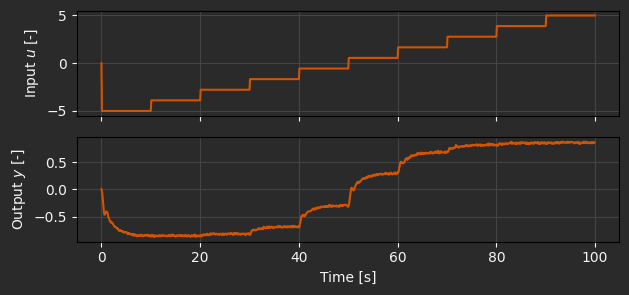

In [3]:
raw_data = np.loadtxt("data/hammerstein_wiener_ladder.csv", skiprows=1, delimiter="\t")

data = arc.sysid.Timeseries(
    ts=raw_data[:, 0],
    us=raw_data[:, 1].reshape(1, -1),
    ys=raw_data[:, 2].reshape(1, -1),
)
dt = data.ts[1] - data.ts[0]

fig, ax = plt.subplots(2, 1, figsize=(7, 3), sharex=True)
ax[0].plot(data.ts, data.us[0], label="Input ($u$)")
ax[0].set_ylabel("Input $u$ [-]")
ax[0].grid()
ax[1].plot(data.ts, data.ys[0], label="Output ($y$)")
ax[1].set_ylabel("Output $y$ [-]")
ax[1].grid()
ax[-1].set_xlabel("Time [s]")
plt.show()
